In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
# Finding the last date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)


('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
precipitation_scores = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23')


In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(precipitation_scores, columns=['date','prcp'])\
                .set_index('date').sort_values(by='date',ascending=True)
df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


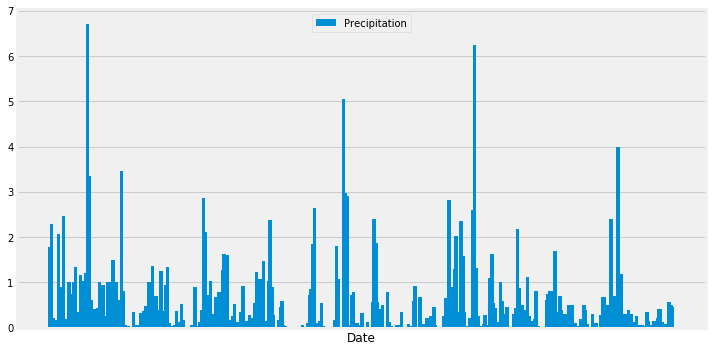

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,5))
plt.bar(df.index,df['prcp'],width=2,label="Precipitation")
plt.legend(loc='upper center')
plt.xticks([])
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_stats = session.query(Measurement.prcp).\
                        filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23')
df_prcp_stats = pd.DataFrame(prcp_stats)
df_prcp_stats.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?
num_station = session.query(Station).group_by(Station.station).count()
print(num_station)

9


In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_freq = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station,).\
                    order_by(func.count(Measurement.station).desc())
for row in station_freq:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                            filter(Measurement.station == station_freq[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_temp = session.query(Measurement.station, Measurement.tobs).\
                            filter(Measurement.date <= '2017-08-23').\
                            filter(Measurement.date >= '2016-08-23').\
                            filter(Measurement.station == station_freq[0][0]).all()
df_hist = pd.DataFrame(highest_temp).set_index('station')
df_hist.head()

,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


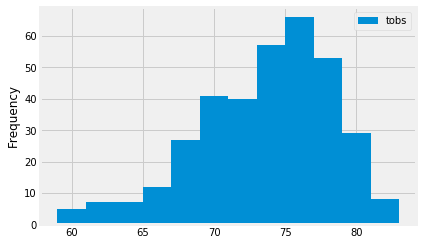

''

In [18]:
# plot the results as a histogram

df_hist.plot.hist(by='station',bins=12)
plt.show()
;